In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50

In [47]:
hk_df=pd.read_csv("Data_Marketing_Customer_Analysis_Round2.csv")

In [48]:
hk_df.columns

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [49]:
hk_df

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [50]:
hk_df.isna().sum()


Unnamed: 0                          0
Customer                            0
State                             631
Customer Lifetime Value             0
Response                          631
Coverage                            0
Education                           0
Effective To Date                   0
EmploymentStatus                    0
Gender                              0
Income                              0
Location Code                       0
Marital Status                      0
Monthly Premium Auto                0
Months Since Last Claim           633
Months Since Policy Inception       0
Number of Open Complaints         633
Number of Policies                  0
Policy Type                         0
Policy                              0
Renew Offer Type                    0
Sales Channel                       0
Total Claim Amount                  0
Vehicle Class                     622
Vehicle Size                      622
Vehicle Type                     5482
dtype: int64

In [51]:
## we decided to drop this column because had many values missing
def drop_column(df,column_name):
    df.drop(columns=[column_name], inplace = True)
    return df
drop_column(hk_df,'Vehicle Type')

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize


In [52]:
hk_df['State'] = hk_df['State'].fillna('Unknown')

In [53]:
hk_df['Response'] = hk_df['Response'].fillna('Unknown')

In [54]:
hk_df['Vehicle Class'] = hk_df['Vehicle Class'].fillna('Unknown')

In [55]:
hk_df['Vehicle Size'] = hk_df['Vehicle Size'].fillna('Unknown')

In [56]:
hk_df.isna().sum()


Unnamed: 0                         0
Customer                           0
State                              0
Customer Lifetime Value            0
Response                           0
Coverage                           0
Education                          0
Effective To Date                  0
EmploymentStatus                   0
Gender                             0
Income                             0
Location Code                      0
Marital Status                     0
Monthly Premium Auto               0
Months Since Last Claim          633
Months Since Policy Inception      0
Number of Open Complaints        633
Number of Policies                 0
Policy Type                        0
Policy                             0
Renew Offer Type                   0
Sales Channel                      0
Total Claim Amount                 0
Vehicle Class                      0
Vehicle Size                       0
dtype: int64

In [57]:
def replace_null_mean(df_columns):
    df_columns = df_columns.fillna(df_columns.mean())
    return df_columns


In [58]:
replace_null_mean(hk_df['Number of Open Complaints'])

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.384256
           ...   
10905    0.384256
10906    0.000000
10907    0.000000
10908    4.000000
10909    0.000000
Name: Number of Open Complaints, Length: 10910, dtype: float64

In [59]:
hk_df.isna().sum()


Unnamed: 0                         0
Customer                           0
State                              0
Customer Lifetime Value            0
Response                           0
Coverage                           0
Education                          0
Effective To Date                  0
EmploymentStatus                   0
Gender                             0
Income                             0
Location Code                      0
Marital Status                     0
Monthly Premium Auto               0
Months Since Last Claim          633
Months Since Policy Inception      0
Number of Open Complaints        633
Number of Policies                 0
Policy Type                        0
Policy                             0
Renew Offer Type                   0
Sales Channel                      0
Total Claim Amount                 0
Vehicle Class                      0
Vehicle Size                       0
dtype: int64

In [60]:
mean_number_compains = round(hk_df["Number of Open Complaints"].median(),1)

In [61]:
hk_df["Number of Open Complaints"] = hk_df["Number of Open Complaints"].fillna(mean_number_compains)

In [62]:
hk_df.isna().sum()


Unnamed: 0                         0
Customer                           0
State                              0
Customer Lifetime Value            0
Response                           0
Coverage                           0
Education                          0
Effective To Date                  0
EmploymentStatus                   0
Gender                             0
Income                             0
Location Code                      0
Marital Status                     0
Monthly Premium Auto               0
Months Since Last Claim          633
Months Since Policy Inception      0
Number of Open Complaints          0
Number of Policies                 0
Policy Type                        0
Policy                             0
Renew Offer Type                   0
Sales Channel                      0
Total Claim Amount                 0
Vehicle Class                      0
Vehicle Size                       0
dtype: int64

In [63]:
median_number_months_claim = round(hk_df["Months Since Last Claim"].median(),1)

In [64]:
hk_df["Months Since Last Claim"] = hk_df["Months Since Last Claim"].fillna(median_number_months_claim)

In [65]:
hk_df.isna().sum()


Unnamed: 0                       0
Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [66]:
## X-y split.

X=hk_df.drop('Total Claim Amount', axis=1)
y=hk_df['Total Claim Amount']

In [67]:
X=X._get_numeric_data()
X

,Unnamed: 0,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,0,4809.216960,48029,61,7.0,52,0.0,9
1,1,2228.525238,0,64,3.0,26,0.0,1
2,2,14947.917300,22139,100,34.0,31,0.0,2
3,3,22332.439460,49078,97,10.0,3,0.0,2
4,4,9025.067525,23675,117,14.0,31,0.0,7
...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,14.0,40,0.0,7
10906,10906,5259.444853,61146,65,7.0,68,0.0,6
10907,10907,23893.304100,39837,201,11.0,63,0.0,2
10908,10908,11971.977650,64195,158,0.0,27,4.0,6


/Users/barbaracamean/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


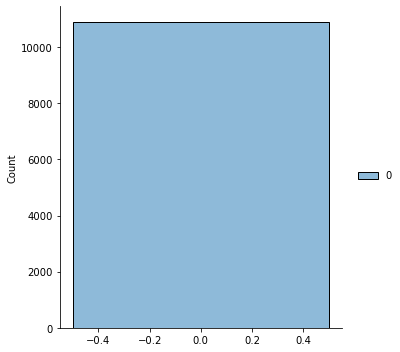

In [68]:
pt = PowerTransformer()
med_home_val_transformed=pt.fit_transform(hk_df['Customer Lifetime Value'].to_numpy().reshape(-1,1))
sns.displot(med_home_val_transformed)

In [69]:
## wth powertransform we did not get the normal distribution
## minMax Scaler is not useful to find the normal distribution
## We could use only quantile transform or std_scaler

std_scaler=StandardScaler().fit(X) 

X_scaled=std_scaler.transform(X)

In [70]:
print(X_scaled)

[[-1.73189206 -0.46610505  0.34563485 ...  0.13987654 -0.4066559
   2.50945468]
 [-1.73157454 -0.84094593 -1.23646244 ... -0.79070911 -0.4066559
  -0.82492205]
 [-1.73125702  1.00652314 -0.50719362 ... -0.61175033 -0.4066559
  -0.40812496]
 ...
 [ 1.73125702  2.30582467  0.07578661 ...  0.53358586 -0.4066559
  -0.40812496]
 [ 1.73157454  0.5742732   0.87815031 ... -0.75491735  4.08725734
   1.25906341]
 [ 1.73189206 -0.16859268 -1.23646244 ... -1.685503   -0.4066559
   0.00867213]]


In [71]:
## Data Splitting and Standarized

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

In [72]:
std_scaler=StandardScaler().fit(X_train) 

X_train_scaled=std_scaler.transform(X_train)

In [73]:
X_test_scaled=std_scaler.transform(X_test)

In [74]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[ 0.80203155 -0.67012951 -0.15774585 ... -0.01013957 -0.40782046
  -0.82332499]
 [ 1.45001358  3.04436074 -0.06737566 ... -1.00885254 -0.40782046
  -0.40834789]
 [ 0.47361529 -0.07213383  1.94886007 ... -1.1158575   0.72638378
   1.25156048]
 ...
 [-0.08839059  0.97879619 -1.2414593  ...  0.27520699 -0.40782046
  -0.40834789]
 [-1.31228641  5.2105416  -0.47281581 ...  0.81023179 -0.40782046
  -0.40834789]
 [-0.60551186 -0.80118397  1.30040098 ...  0.70322683 -0.40782046
  -0.82332499]]
--------
[[-1.36380888 -0.82006016 -1.2414593  ... -1.57954566 -0.40782046
  -0.82332499]
 [-1.07047848 -0.28953319 -0.56580302 ...  0.41788027  0.72638378
   0.4216063 ]
 [ 0.78180187 -0.38514774  1.11671231 ... -1.22286246 -0.40782046
   1.25156048]
 ...
 [ 1.26130857 -0.74223931  1.42823769 ... -1.61521398 -0.40782046
  -0.82332499]
 [-1.32587822  0.63136522 -0.03802522 ... -0.97318422 -0.40782046
   0.4216063 ]
 [-1.03412827  0.14524812 -1.2414593  ... -0.83051094 -0.40782046
   0.4216063 ]]


In [75]:
## Apply linear regression
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train


LinearRegression()

In [76]:
## Finding constant values Alpha & Beta
model.coef_

array([   2.57120126,   -3.42957838, -100.98638914,  183.988394  ,
          1.79328314,   -5.22816026,   -1.69073849,    0.73978895])

In [77]:
## Beta is = 0
model.intercept_

434.1323053463402

In [78]:
## Making prediction
y_pred=model.predict(X_test_scaled)   # model prediction
##y_pred_train=model.predict(X_train)

In [79]:
y_test

1183     518.400000
2111     364.800000
7971      29.984815
7189     166.937747
3103     556.800000
           ...     
5104     350.400000
1632     934.656068
9488      97.928632
1303     388.148089
2226    1176.285998
Name: Total Claim Amount, Length: 3273, dtype: float64

In [80]:
y_pred

array([456.45625844, 395.19008501, 192.81151105, ..., 204.35789146,
       766.37333825, 741.91311146])

In [82]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

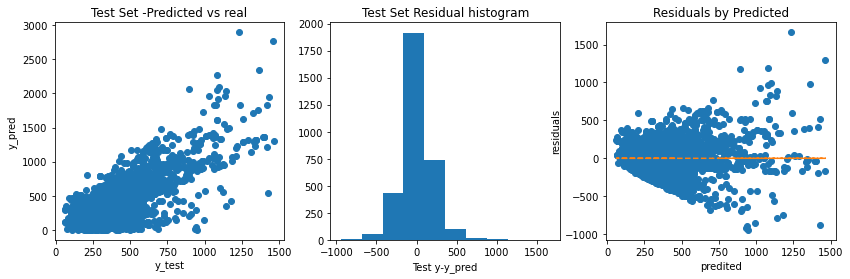

In [83]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predited")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

In [ ]:
##Model Interpretation.
## Above we can see that follows a linear regresion model in the first graphic. Also that is normal distribution and third?

In [95]:
## Model Validation
import math
print(mse(y_test,y_pred)) ## the MSE is the average squared distance between the observed and predicted values
print(mae(y_test,y_pred)
print(math.sqrt(mse(y_test,y_predicted))) ### RMSE. How close a regression line is to a set of points

SyntaxError: invalid syntax (1683972132.py, line 5)

In [93]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [94]:
features_importances

,Attribute,Importance
3,Monthly Premium Auto,183.988394
2,Income,100.986389
5,Months Since Policy Inception,5.228160
1,Customer Lifetime Value,3.429578
0,Unnamed: 0,2.571201
4,Months Since Last Claim,1.793283
6,Number of Open Complaints,1.690738
7,Number of Policies,0.739789


In [356]:
## Asign it back to the dataframe and then check the distribution again

In [357]:
##One Hot/Label Encoding (categorical).
categoricals_features = hk_df.select_dtypes("object")
categoricals_features

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize


In [358]:
state_dummy = pd.get_dummies(categoricals_features["State"], drop_first=True)

In [314]:
response_dummy = pd.get_dummies(categoricals_features["Response"], drop_first=True)

In [315]:
coverage_dummy = pd.get_dummies(categoricals_features["Coverage"], drop_first=True)

In [316]:
education_dummy = pd.get_dummies(categoricals_features["Education"], drop_first=True)


In [381]:
categorical_columns = ['State', 'Response','Coverage']
for column in categorical_columns:
      tempdf = pd.get_dummies(categoricals_features[column], prefix=column)
print(categoricals_features)

      Customer       State Response  Coverage Education Effective To Date  \
0      DK49336     Arizona       No     Basic   College           2/18/11   
1      KX64629  California       No     Basic   College           1/18/11   
2      LZ68649  Washington       No     Basic  Bachelor           2/10/11   
3      XL78013      Oregon      Yes  Extended   College           1/11/11   
4      QA50777      Oregon       No   Premium  Bachelor           1/17/11   
...        ...         ...      ...       ...       ...               ...   
10905  FE99816      Nevada       No   Premium  Bachelor           1/19/11   
10906  KX53892      Oregon       No     Basic   College            1/6/11   
10907  TL39050     Arizona       No  Extended  Bachelor            2/6/11   
10908  WA60547  California       No   Premium   College           2/13/11   
10909  IV32877     Unknown  Unknown     Basic  Bachelor            1/8/11   

      EmploymentStatus Gender Location Code Marital Status     Policy Type 

In [377]:
categorical_columns = ['State', 'State','Coverage']
for column in categorical_columns:
      tempdf = pd.get_dummies(categoricals_features[column], prefix=column)
    
    
    categoricals_features = pd.merge(
        left=df,
        right=tempdf,
        left_index=True,
        right_index=True,
    )
    categoricals_features = df.drop(columns=column)
print(categoricals_feature)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 4)

In [322]:
## use this function to join all the categorical features in the table again
merged = pd.concat([categoricals_features, pd.get_dummies(categoricals_features["Coverage"],prefix='coverage')],axis=1)
merged




,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,coverage_Basic,coverage_Extended,coverage_Premium
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,1,0,0
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,1,0,0
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,1,0,0
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,0,1,0
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,0,0,1
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,1,0,0
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,0,1,0
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,0,0,1


In [384]:
## drop the original categorical ones

final = merged.drop((['Response','Coverage','Education']),axis = 1)


In [325]:
final

,Customer,State,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,coverage_Basic,coverage_Extended,coverage_Premium
0,DK49336,Arizona,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,1,0,0
1,KX64629,California,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,1,0,0
2,LZ68649,Washington,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,1,0,0
3,XL78013,Oregon,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,0,1,0
4,QA50777,Oregon,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,0,0,1
10906,KX53892,Oregon,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,1,0,0
10907,TL39050,Arizona,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,0,1,0
10908,WA60547,California,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,0,0,1


In [327]:
#Create a Lineal regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
X = final.drop